In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance=pd.read_csv('insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#  How significant is the difference in medical charges between smokers and non-smokers? 

<Figure size 1500x600 with 0 Axes>

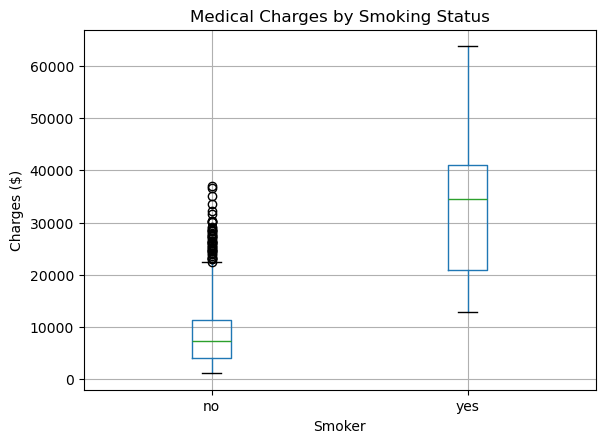

In [31]:

plt.figure(figsize=(15,6))
insurance.boxplot(column="charges", by="smoker")
plt.title("Medical Charges by Smoking Status")
plt.suptitle("")
plt.xlabel("Smoker")
plt.ylabel("Charges ($)")
plt.show()

# What is the general relationship between a customer's age and their charges? 

In [3]:
dia=insurance[['age','charges']].corr()
dia

,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


### Interpretation :weak correlation

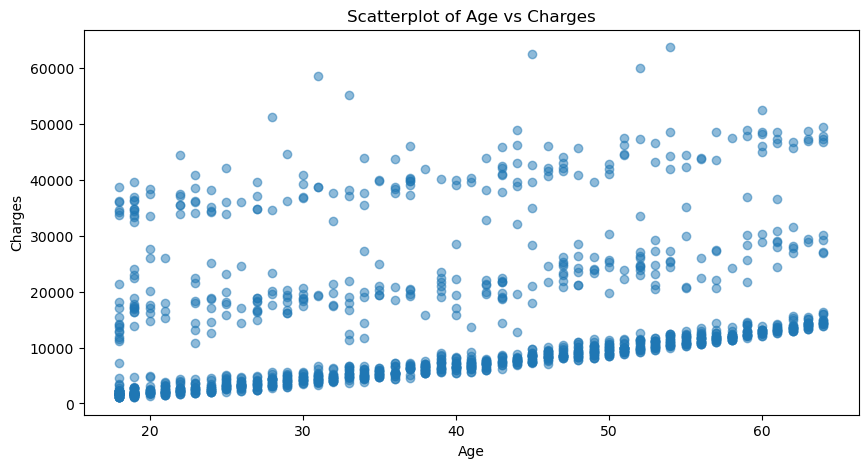

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(insurance['age'], insurance['charges'], alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Scatterplot of Age vs Charges")
plt.show()


#   Our wellness team considers a BMI over 30 to be in the "obese" category. Are medical charges notably higher for this group compared to those with a BMI under 30? 

<Figure size 800x600 with 0 Axes>

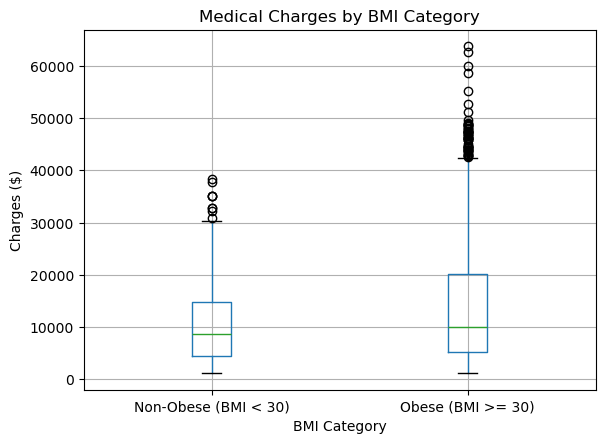

In [32]:
insurance['bmi_category'] = insurance['bmi'].apply(lambda x: 'Obese (BMI >= 30)' if x >= 30 else 'Non-Obese (BMI < 30)')

plt.figure(figsize=(8,6))
insurance.boxplot(column="charges", by="bmi_category")
plt.title("Medical Charges by BMI Category")
plt.suptitle("")
plt.xlabel("BMI Category")
plt.ylabel("Charges ($)")
plt.show()

# Which geographic region has the highest average insurance charges?

In [37]:
avg=insurance.groupby("region")["charges"].mean()
avg

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

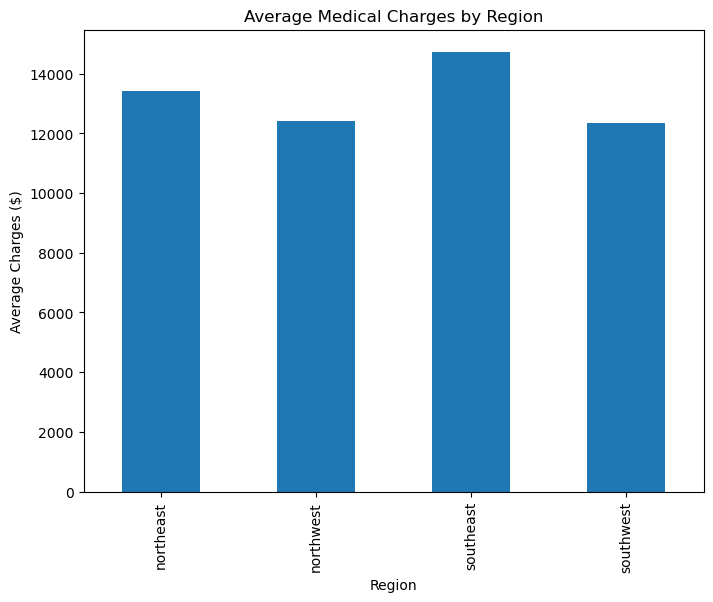

In [39]:
plt.figure(figsize=(8,6))
avg.plot(kind="bar")
plt.title("Average Medical Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges ($)")
plt.show()

# How does the relationship between BMI and charges differ for smokers versus non smokers?

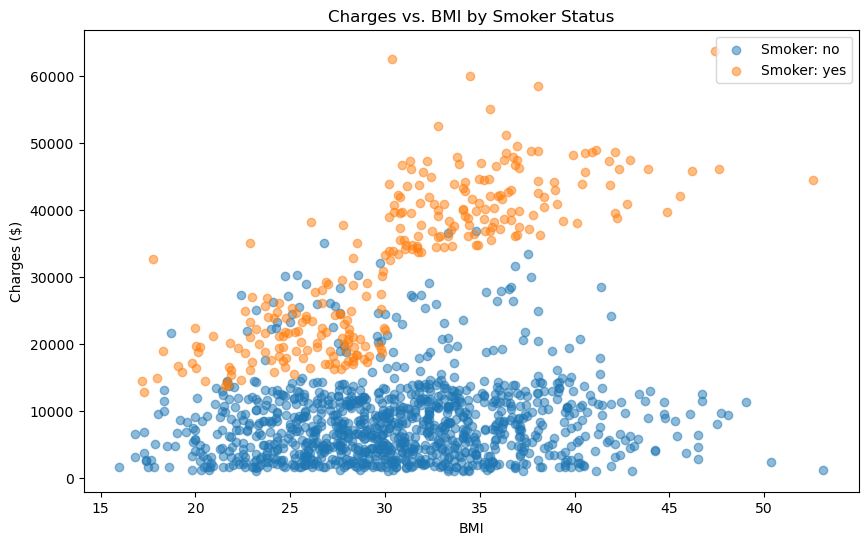

In [40]:
plt.figure(figsize=(10,6))
for smoker_status, group in insurance.groupby("smoker"):
    plt.scatter(group["bmi"], group["charges"], alpha=0.5, label=f"Smoker: {smoker_status}")

plt.xlabel("BMI")
plt.ylabel("Charges ($)")
plt.title("Charges vs. BMI by Smoker Status")
plt.legend()
plt.show()